# Die Fourierzerlegung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integr
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import cv2   # Open computer vision library

# Defintionen
Hier definieren wir uns Sinus- und Kosinusfunktionen, die in das Intervall $[-\frac{L}{2},\frac{L}{2}]$> reinpassen

In [ ]:
#Definition von Funktionen
def cos(x,n=1,L=1):
    return np.cos(n*2.*np.pi/L*x)
def sin(x,n=1,L=1):
    return np.sin(n*2*np.pi/L*x)

Dann stellen wir einige dieser Funktionen graphisch dar:

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1, adjustable='box', aspect=0.5)
ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=0.5)
#fig, (ax1,ax2) = plt.subplots(1,2)
x = np.linspace(-.5,.5,201)
#
ax1.set_title('Cosinus')
ax2.set_title('Sinus')
for n in np.arange(3):
    ax1.plot(x, cos(x,n,1))
    ax2.plot(x, sin(x,n,1))

# Testfunktionen
Wir definieren Testfunktionen, die wir in eine Fourierreihe zerlegen.

In [ ]:
# Mexican hat
def f(x):
    return -4.*x**2+16.*x**4
# Die Ableitung des Mexican hat
def fp(x):
    return 2.*x-4.*x**3
# Das Integral des Mexican hat
def F(x):
    return (x**3)/3. - (x**5)/5.

In [ ]:
%matplotlib inline
x = np.linspace(-.5,.5,201)
fig, ax = plt.subplots() # let us plot the data
ax.set_xlim([-.51, .51])
ax.set_ylim([-.26, .01])
ax.plot(x,f(x))
#ax.plot(x,y)

In [ ]:
x = np.linspace(-1,1,201)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)
ax[0,0].plot(x,x,label='y=x')
ax[0,0].set_ylabel('y')
ax[0,0].legend()
ax[0,0].grid()
ax[0,1].plot(x,x**2)
ax[1,0].plot(x,x**3)
ax[1,1].plot(x,x**4-x**2)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(x,x,label='y=x')
ax.set_ylabel('y')
ax.grid(ls='--')
ax.plot(x,x**2,label='y=x**2')
ax.plot(x,x**3,label='y=x**3')
ax.plot(x,x**4-x**2,label='y=x**4-x**2')
ax.legend()

# Integration
Integration mit numpy.trapz

In [ ]:
L = 1.
n = 1
m = 1
x = np.linspace(-1.,1.,201)
#plt.plot(x,cos(x,n,L))
#plt.plot(x,cos(x,m,L))
plt.plot(x,cos(x,n,L)*cos(x,m,L))
#np.trapz(cos(x,n,L))

In [ ]:
L=1
c = [np.trapz(cos(x,i,L)*f(x),dx=0.01) for i in np.arange(101)]

In [ ]:
s = [np.trapz(sin(x,i,L)*f(x),dx=0.01) for i in np.arange(11)]
y_cos = np.array([c[i]*cos(x,i,L) for i in np.arange(101)])
y_cos[0] = y_cos[0]/2

In [ ]:
%matplotlib notebook
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
#
#for i in np.arange(11):
#    ax.plot(y_cos[i])
ax1.plot(x,f(x))
ax2.plot(x,np.sum(y_cos,axis=0))
ax3.plot(c)

# Fourierreihe in 2D


In [ ]:
x = np.linspace(-1.,1.,21)
y = np.linspace(-1.,1.,21)
X,Y = np.meshgrid(x,y)
#A = np.exp(-(X**2+Y**2))  # Gaussfunktion auf dem 2D Intervall 

In [ ]:
def f1(x,y):
    return x*y
def f2(x,y):
    return x**2*y**2
def f3(x,y):
    return x**2*y+x*y**2
def f4(x,y):
    return np.exp(-(x**2+y**2))

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
#
A = f1(X,Y)
ax.imshow(A)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
A = f1(X,Y)
ax.plot_surface(X, Y, A, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



In [ ]:
%matplotlib notebook
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
#
A = f1(X,Y)
FTA = np.fft.fft2(A)
ax1.imshow(A.real)
ax2.imshow(FTA.real)
FTAshift = np.fft.fftshift(FTA)
ax3.imshow(FTAshift.real)
FTAshift[7:14,7:14] = 0
FTA = np.fft.fftshift(FTAshift)
ax4.imshow(FTAshift.real)
FTAinv = np.fft.ifft2(FTA)
ax5.imshow(FTAinv.real)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#A = f1(X,Y)
ax.plot_surface(X, Y, FTAinv.real, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [2]:
img = cv2.imread('Picture.jpg',0) #Lade das Bild
x = np.arange(img.shape[0])
y = np.arange(img.shape[1])
X,Y = np.meshgrid(x,y)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.imshow(img)

# Textfiles

In [26]:
textimg = cv2.imread('Uebung10klein.jpg')#,0) #Lade das Bild

<IPython.core.display.Javascript object>


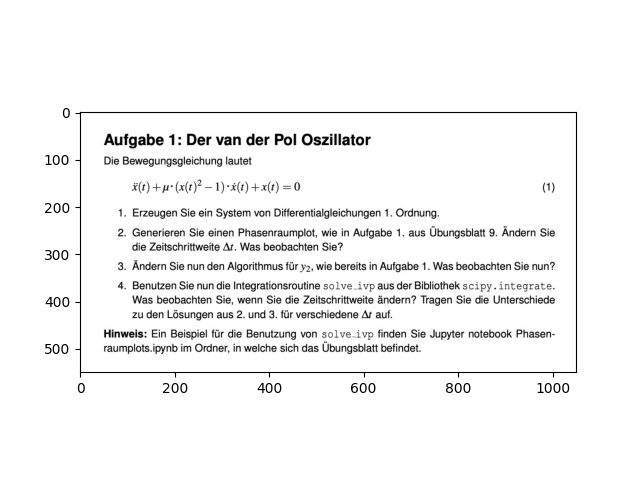

In [45]:
%matplotlib notebook
textimg = cv2.imread('Uebung10klein.jpg')#,0) #Lade das Bild
#
fig, ax = plt.subplots()
ax.imshow(textimg[250:800,100:1150])

In [50]:
FTtextimg = np.fft.fft2(textimg[250:800,100:1150,0])

<IPython.core.display.Javascript object>


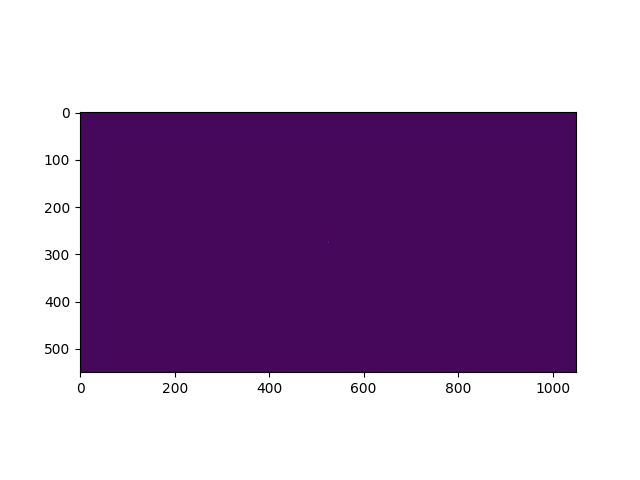

In [51]:
%matplotlib notebook
fig, ax = plt.subplots()
#
FTtextimgshift = np.fft.fftshift(FTtextimg)
ax.imshow(FTtextimgshift.real)

In [39]:
np.fft.fftshift(FTtextimg).real

array([[-2252.        ,  1450.98858554,   497.20721512, ...,
         -343.75801509,   497.20721512,  1450.98858554],
       [-1709.32945278,  1436.48561045, -5428.05971363, ...,
         1518.43683557,  1575.27775952,   739.08127013],
       [  216.27066197,  -927.16405711, -1425.08363923, ...,
        -3042.81714691,  4034.47759505,  2224.80556831],
       ...,
       [ 2034.24603575,  -600.01883576, -1932.74872735, ...,
        -1289.78396943,  3195.98072457,  1124.02144923],
       [  216.27066197,  2224.80556831,  4034.47759505, ...,
         2149.8581614 , -1425.08363923,  -927.16405711],
       [-1709.32945278,   739.08127013,  1575.27775952, ...,
        -1297.26998023, -5428.05971363,  1436.48561045]])

<IPython.core.display.Javascript object>


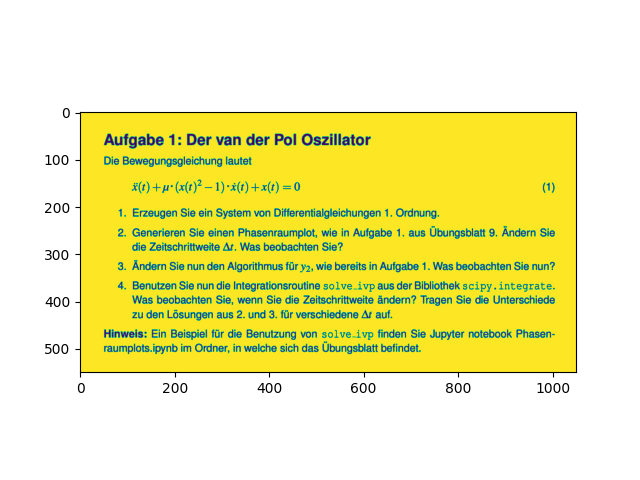

In [52]:
%matplotlib notebook
fig, ax = plt.subplots()
#
ax.imshow(np.fft.ifft2(FTtextimg).real)

In [54]:
textimg[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)